# Load Data and Modules Needed

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
file_train = "~/ds/projects/mod_3_project/tanzania-water-wells/data/raw/training-set-values.csv" #x_train, training set values data
file_target_train = "~/ds/projects/mod_3_project/tanzania-water-wells/data/raw/training-labels.csv" #y_train, training set labels
file_test = "~/ds/projects/mod_3_project/tanzania-water-wells/data/raw/test-set.csv" #x_test, test set data

In [131]:
targets

id             status_group
0      69572               functional
1       8776               functional
2      34310               functional
3      67743           non functional
4      19728               functional
5       9944               functional
6      19816           non functional
7      54551           non functional
8      53934           non functional
9      46144               functional
10     49056               functional
11     50409               functional
12     36957               functional
13     50495               functional
14     53752               functional
15     61848               functional
16     48451           non functional
17     58155           non functional
18     34169  functional needs repair
19     18274               functional
20     48375               functional
21      6091               functional
22     58500  functional needs repair
23     37862               functional
24     51058               functional
25     22308  functional needs repair
26     55012               functional
27     20145               functional
28     19685           non functional
29     69124               functional
...      ...                      ...
59370  14796               functional
59371  20387           non functional
59372  29940           non functional
59373  15233               functional
59374  49651               functional
59375  50998               functional
59376  34716           non functional
59377  43986           non functional
59378  38067               functional
59379  58255               functional
59380  30647           non functional
59381  67885           non functional
59382  47002           non functional
59383  44616               functional
59384  72148           non functional
59385  34473               functional
59386  34952               functional
59387  26640               functional
59388  72559               functional
59389  30410               functional
59390  13677               functional
59391  44885           non functional
59392  40607           non functional
59393  48348               functional
59394  11164           non functional
59395  60739               functional
59396  27263               functional
59397  37057               functional
59398  31282               functional
59399  26348               functional

[59400 rows x 2 columns]

In [3]:
features = pd.read_csv(file_train)
targets = pd.read_csv(file_target_train)
X_test = pd.read_csv(file_test)

In [4]:
features.shape

(59400, 40)

# EDA

In [5]:
targets['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [6]:
features.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

## Definitely an imbalance in the training target data, and there are a lot of categorical features!

There are also several features that look very related, source/source_type, waterpoint_type/waterpoint_type_group, payment/payment_type, etc. 

In [7]:
wells = features.copy()

In [8]:
wells['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [9]:
wells['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

quantity and quantity_group are literal copies of eachother

In [10]:
wells['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [11]:
wells['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

Management is harder to tell..

In [12]:
wells['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [13]:
wells['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

I like type, besides dam all of the types seem to numerous

In [14]:
wells['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [15]:
wells['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [16]:
wells['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [17]:
wells['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [18]:
wells['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [19]:
wells['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [20]:
wells['funder'].value_counts()

Government Of Tanzania           9084
Danida                           3114
Hesawa                           2202
Rwssp                            1374
World Bank                       1349
Kkkt                             1287
World Vision                     1246
Unicef                           1057
Tasaf                             877
District Council                  843
Dhv                               829
Private Individual                826
Dwsp                              811
0                                 777
Norad                             765
Germany Republi                   610
Tcrs                              602
Ministry Of Water                 590
Water                             583
Dwe                               484
Netherlands                       470
Hifab                             450
Adb                               448
Lga                               442
Amref                             425
Fini Water                        393
Oxfam       

In [21]:
wells['installer'].value_counts()

DWE                    17402
Government              1825
RWE                     1206
Commu                   1060
DANIDA                  1050
KKKT                     898
Hesawa                   840
0                        777
TCRS                     707
Central government       622
CES                      610
Community                553
DANID                    552
District Council         551
HESAWA                   539
LGA                      408
World vision             408
WEDECO                   397
TASAF                    396
District council         392
Gover                    383
AMREF                    329
TWESA                    316
WU                       301
Dmdd                     287
ACRA                     278
World Vision             270
SEMA                     249
DW                       246
OXFAM                    234
                       ...  
St Magreth Church          1
Mwita Machoa               1
Maswi Company              1
Africaone Ltd 

In [22]:
wells['subvillage'].value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Msikitini         134
Miembeni          134
1                 132
Kibaoni           114
Kanisani          111
I                 109
Mapinduzi         109
Mjimwema          108
Mjini             108
Mkwajuni          104
Mwenge            102
Azimio             98
Mabatini           98
Mission            95
Mbugani            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Mongahay            1
Mlega               1
Rubanda             1
Buhehe              1
Wame A              1
Nyasa Juu           1
Unyangii            1
Bupandwamela        1
Nkungi              1
Tuzimu              1
Mianzi              1
Kilele              1
Nyagwirongwe        1
Kitoma Na Mach      1
Wangamagan

### Let's look at how the numerical data is correlated:

In [23]:
wells.corr()

id  amount_tsh  gps_height  longitude  latitude  \
id                 1.000000   -0.005321   -0.004692  -0.001348  0.001718   
amount_tsh        -0.005321    1.000000    0.076650   0.022134 -0.052670   
gps_height        -0.004692    0.076650    1.000000   0.149155 -0.035751   
longitude         -0.001348    0.022134    0.149155   1.000000 -0.425802   
latitude           0.001718   -0.052670   -0.035751  -0.425802  1.000000   
num_private       -0.002629    0.002944    0.007237   0.023873  0.006837   
region_code       -0.003028   -0.026813   -0.183521   0.034197 -0.221018   
district_code     -0.003044   -0.023599   -0.171233   0.151398 -0.201020   
population        -0.002813    0.016288    0.135003   0.086590 -0.022152   
construction_year -0.002082    0.067915    0.658727   0.396732 -0.245278   

                   num_private  region_code  district_code  population  \
id                   -0.002629    -0.003028      -0.003044   -0.002813   
amount_tsh            0.002944    -0.026813      -0.023599    0.016288   
gps_height            0.007237    -0.183521      -0.171233    0.135003   
longitude             0.023873     0.034197       0.151398    0.086590   
latitude              0.006837    -0.221018      -0.201020   -0.022152   
num_private           1.000000    -0.020377      -0.004478    0.003818   
region_code          -0.020377     1.000000       0.678602    0.094088   
district_code        -0.004478     0.678602       1.000000    0.061831   
population            0.003818     0.094088       0.061831    1.000000   
construction_year     0.026056     0.031724       0.048315    0.260910   

                   construction_year  
id                         -0.002082  
amount_tsh                  0.067915  
gps_height                  0.658727  
longitude                   0.396732  
latitude                   -0.245278  
num_private                 0.026056  
region_code                 0.031724  
district_code               0.048315  
population                  0.260910  
construction_year           1.000000

district_code and region_code have a high correlation, but instinctually this would make sense as they are probably related. population shows some correlation to construction_year, but this is probably not normalized to the growth in population over time. Something to note is that construction_year and gps_height have the highest correlation - is there something allowing them to build at higher elevations that was not possible previously? 

This made us consider other technological innovations. extraction_type, extraction_type_class and extraction_type_group possibly fit the bill. 

In [24]:
wells['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

### Uh-oh
Over 1/3 of the data has a 0 for construction year. What are these three different groups, and how are the non-zeroes correlated with extraction type?

In [25]:
wells['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [26]:
wells['extraction_type'].value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [27]:
wells['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [28]:
con_year_nonzero = wells.copy()

con_year_nonzero = con_year_nonzero.replace(0, np.nan)
con_year_nonzero = con_year_nonzero.dropna(how='all', axis=1)

In [29]:
con_year_nonzero['construction_year'].value_counts().sum()

38691

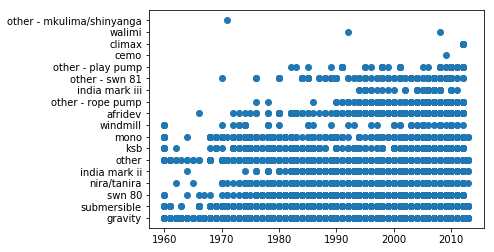

In [30]:
plt.scatter(con_year_nonzero['construction_year'],con_year_nonzero['extraction_type'])

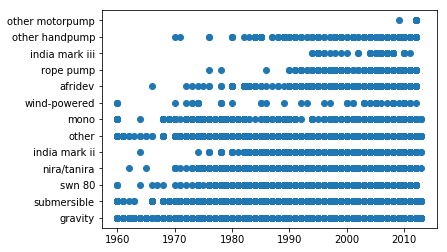

In [32]:
plt.scatter(con_year_nonzero['construction_year'],con_year_nonzero['extraction_type_group'])

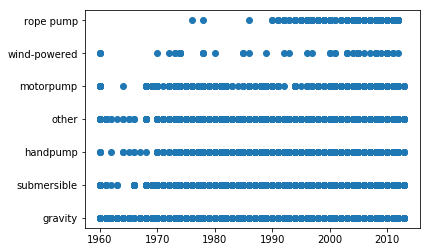

In [34]:
plt.scatter(con_year_nonzero['construction_year'],con_year_nonzero['extraction_type_class'])

In [35]:
avg_con_years = pd.DataFrame(con_year_nonzero.groupby(['extraction_type']).mean()['construction_year'])
avg_con_years

construction_year
extraction_type                             
afridev                          2002.316821
cemo                             2009.000000
climax                           2012.000000
gravity                          1995.965949
india mark ii                    2001.308428
india mark iii                   2004.126984
ksb                              1999.250000
mono                             1992.634541
nira/tanira                      1999.421166
other                            1993.136859
other - mkulima/shinyanga        1971.000000
other - play pump                2002.620000
other - rope pump                2005.810256
other - swn 81                   2000.346591
submersible                      1999.321214
swn 80                           1996.671370
walimi                           2000.000000
windmill                         1995.377049

In [36]:
wells_test = wells.copy()
wells_test = pd.concat([wells_test,avg_con_years],keys=['extraction_type'])
avg_con_years['construction_year'] = avg_con_years['construction_year'].astype(int)
wells_test = wells_test.join(avg_con_years, rsuffix='avg', on='extraction_type') 
wells_test = wells_test.reset_index()
wells_test = wells_test.drop(['level_0','level_1'],axis=1)
wells_test

id  amount_tsh date_recorded                    funder  gps_height  \
0      69572      6000.0    2011-03-14                     Roman        1390   
1       8776         0.0    2013-03-06                   Grumeti        1399   
2      34310        25.0    2013-02-25              Lottery Club         686   
3      67743         0.0    2013-01-28                    Unicef         263   
4      19728         0.0    2011-07-13               Action In A           0   
5       9944        20.0    2011-03-13       Mkinga Distric Coun           0   
6      19816         0.0    2012-10-01                      Dwsp           0   
7      54551         0.0    2012-10-09                     Rwssp           0   
8      53934         0.0    2012-11-03                  Wateraid           0   
9      46144         0.0    2011-08-03               Isingiro Ho           0   
10     49056         0.0    2011-02-20                   Private          62   
11     50409       200.0    2013-02-18                    Danida        1062   
12     36957         0.0    2012-10-14              World Vision           0   
13     50495         0.0    2013-03-15   Lawatefuka Water Supply        1368   
14     53752         0.0    2012-10-20                     Biore           0   
15     61848         0.0    2011-08-04                     Rudep        1645   
16     48451       500.0    2011-07-04                    Unicef        1703   
17     58155         0.0    2011-09-04                    Unicef        1656   
18     34169         0.0    2011-07-22                    Hesawa        1162   
19     18274       500.0    2011-02-22                    Danida        1763   
20     48375       200.0    2011-02-27                       Twe        2216   
21      6091         0.0    2013-02-10                      Dwsp           0   
22     58500         0.0    2011-10-04                    Unicef        1510   
23     37862       500.0    2013-11-03                       Isf         672   
24     51058         0.0    2013-01-21  African Development Bank        1645   
25     22308         0.0    2013-02-25    Government Of Tanzania        1273   
26     55012       500.0    2013-01-16                    Sobodo         200   
27     20145         0.0    2011-07-11                    Hesawa           0   
28     19685         0.0    2013-03-05    Government Of Tanzania        1443   
29     69124         0.0    2013-03-16   Lawatefuka Water Supply        1256   
...      ...         ...           ...                       ...         ...   
59370  14796       200.0    2013-01-29                       NaN        1154   
59371  20387         0.0    2012-10-09               Netherlands           0   
59372  29940         0.0    2012-10-31                       Tlc           0   
59373  15233      5000.0    2013-01-30                     Rudep        1137   
59374  49651         0.0    2012-10-29                     Rwssp           0   
59375  50998     40000.0    2011-08-03    Government Of Tanzania          54   
59376  34716         0.0    2013-02-03                       NaN        1581   
59377  43986         0.0    2012-10-23    Government Of Tanzania           0   
59378  38067       500.0    2011-03-21                        Rc        2101   
59379  58255         0.0    2011-07-13                        Do           0   
59380  30647      6000.0    2011-03-14                     Roman        1439   
59381  67885         0.0    2011-03-16       Mkinga Distric Coun           0   
59382  47002         6.0    2013-08-03                 Ces(gmbh)        1383   
59383  44616         0.0    2013-01-19                World Bank          11   
59384  72148         0.0    2011-07-10                   Concern           0   
59385  34473       500.0    2012-11-03                     Jaica        1327   
59386  34952         0.0    2011-08-22                       Adb        1786   
59387  26640       100.0    2013-03-12                         0          25   
59388  725

In [37]:
def con_year(row: pd.DataFrame) -> int:
        ## This function replaces 
        if (row['construction_year'] == 0):
            return row['construction_yearavg']
        else:
            return row['construction_year']
            print('same')
wells_test['construction_year'] = wells_test.apply(con_year, axis=1)

In [38]:
wells_test['construction_year'] = wells_test.apply(con_year, axis=1)

In [39]:
wells_test['construction_year'].value_counts()

1995    7880
1999    7491
1993    3275
2010    2645
2009    2622
2008    2613
1996    2284
2000    2190
1992    1959
2002    1911
2007    1587
2006    1471
2003    1286
2001    1267
2011    1256
2004    1158
2012    1108
2005    1072
1978    1037
1998     966
1990     954
1985     945
1980     811
1984     779
1982     744
1994     738
1972     708
1974     676
1997     644
1988     521
1983     488
1975     437
1986     434
1976     414
1970     411
1991     324
1989     316
1987     302
1981     238
1977     202
1979     192
1973     184
2013     176
1971     146
1960     102
1967      88
1963      85
1968      77
1969      59
1964      40
1962      30
1961      21
1965      19
1966      17
Name: construction_year, dtype: int64

# Building A Base Model

Since we are limited to our number of submissions to the contest daily, we will train/test split the provided training data to create iterative models

### Split into train/test

In [40]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=42)

In [41]:
features_list = ['basin', 'region',
       'scheme_management', 'scheme_name',
       'extraction_type',
       'management', 'payment', 
       'water_quality', 'quantity',
       'source', 'waterpoint_type','gps_height', 'longitude', 'latitude', 'num_private', 
        'region_code', 'district_code', 'population', 'construction_year']   


In [42]:
wells['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [43]:
wells['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

### Cleaning Data

In [44]:
wells = features.copy()
wells.shape

(59400, 40)

In [45]:
# def feature_splitter(df,features):
#     # this is the second step of the pipeline, after train/test split, splitting feature list into objects and numerical lists, for more
#     # processing
#     df = df[features]
#     obj_list = []
#     num_list = []
#     ## below updates df with construction year before splitting extractor type away
#     df = con_year_avg(df)
    
#     ## appends lists with columns based upon their dtypes
#     for col in df.select_dtypes([np.object]):
#         obj_list.append(col)
#     for col in df.select_dtypes([np.int, np.float]):
#         num_list.append(col)
    
#     df_num = df[num_list].drop(['construction_year_avg'], axis = 1)
    
#     return df[obj_list], df_num


In [46]:
objects, numericals = feature_splitter(wells,features_list)

NameError: name 'feature_splitter' is not defined

In [109]:
def numerical_clean(df, feature_list):
    #this takes the df and the list of numerical features to clean
    df = df[feature_list]
    print("1. ", df.shape)
    print('---Dropping 0 longitudes...')
    df = drop_zero_long(df)
    print("2. ", df.shape)
    print("---Replace 0's with average constructor year...")
    df = con_year_avg(df)
    print("3. ", df.shape)
    print('Returning a cleaned dataframe...\n')
    return df

In [48]:
## this is in numerical clean function
def drop_zero_long(df):
    return df.drop(df[df.longitude==0].index)
# wells2 = wells.drop(wells[wells.longitude==0].index)
# wells2

In [49]:
def con_year(row: pd.DataFrame) -> int:
        ## This function replaces rows with contruction_year == 0 with the average year based upon their extractor type
        if (row['construction_year'] == 0):
            return row['construction_year_avg']
        else:
            return row['construction_year']

In [50]:
def con_year_avg(df):
    con_year_nonzero = df.replace(0, np.nan)
#     con_year_nonzero = con_year_nonzero.dropna(how='all', axis=1) don't think we need this
    avg_con_years = pd.DataFrame(con_year_nonzero.groupby(['extraction_type']).mean()['construction_year'])
#     avg_con_years['construction_year'] = avg_con_years['construction_year'].astype(int)
    df = df.join(avg_con_years, rsuffix = '_avg', on = 'extraction_type')
    df = df.reset_index()
    df = df.drop(['index'], axis = 1)
    df['construction_year'] = wells_test.apply(con_year, axis=1)
    df = df.drop(['construction_year_avg'], axis = 1)
    return df

In [51]:
test = con_year_avg(wells)
# test.construction_year.value_counts()

In [52]:
test = numerical_clean(wells)

TypeError: numerical_clean() missing 1 required positional argument: 'feature_list'

In [ ]:
# this is with no list
# def obj_preprocessing(df):
#     '''
#     '''
#     # Clean the df if there are NaNs
#     df = NaN_cleaning(df)
#     #OHE data
#     array_current = ohe_data(df)
#     #return a dataframe of the OHE data
#     return pd.DataFrame(array_current)

# def ohe_data(df):
#     #OHE the data
#     onehotencoder = OneHotEncoder() # Instantiate a One Hot Encoder object 
#     print('One hot encoding data')
#     array_current = onehotencoder.fit_transform(df).toarray()
#     return array_current

# def NaN_cleaning(df):
#     # Replace NaN with "unknown" bin
#     print('Cleaning the data')
#     df = df.replace(np.nan, 'unknown')
#     print(f'Check: Number of rows with nulls: {len(df[df.isna().any(axis=1)])}')
#     return df

In [153]:
def obj_preprocessing(df, obj_list, ohe, train = True):
    '''
    the df doesn't have the depedent variable
    '''
    df_current = df[obj_list]
    # Clean the df if there are NaNs
    df = NaN_cleaning(df_current)
    #OHE data
    array_current = ohe_data(df, ohe, train)
    #return a dataframe of the OHE data
    return pd.DataFrame(array_current)

def ohe_data(df, ohe, train):
    #OHE the data
    print('Begin one hot encoding data...')
    if train:
        array_current = ohe.fit_transform(df).toarray()
    else:
        array_current = ohe.transform(df).toarray()
    print('Finish one hot encoding data...\n')
    return array_current

def NaN_cleaning(df):
    # Replace NaN with "unknown" bin
    print('---Replacing NaN with "unknown" bin...')
    df = df.replace(np.nan, 'unknown')
    print(f'---Check: Number of rows with nulls: {len(df[df.isna().any(axis=1)])}...\n')
    return df.reset_index(drop=True)

In [150]:
obj_pp = obj_preprocessing(objects)

NameError: name 'objects' is not defined

# FINAL? WORKING PIPELINE

In [155]:
# Be sure to train/test split before processing DFs
def model_preprocessing(df, feature_list, ohe, train=True):
    print('Begin numerical cleaning...')
    df = numerical_clean(df, feature_list)
    
    # below should probably be a funciton for cleanliness
    print('\nRemoving the target from the cleaned data frame...')
    target = df['status_group']
    print("Length of target: ", len(target))
    df = df.drop(columns='status_group', axis = 1)
#    print(df['status_group'])
    obj_list = obj_lister(df)
    print('\nBegin object cleaning...')
    ohe_df = obj_preprocessing(df, obj_list, ohe, train)
    print("Shape of ohe_df: ", ohe_df.shape)
    
    assert(len(target) == len(ohe_df)), "Something is wrong"
    
    df = df.drop(obj_list, axis=1)
    model_df = df.join(ohe_df)
    print('Returning the main and target data frames...')
    
    assert(len(model_df) == len(target)), "Something is wrong"
    return model_df, target

## Work below

In [136]:
wells = features.copy()
wells.shape

(59400, 40)

In [137]:
features_list = ['basin', 'region',
       'scheme_management', 'scheme_name',
       'extraction_type',
       'management', 'payment', 
       'water_quality', 'quantity',
       'source', 'waterpoint_type','gps_height', 'longitude', 'latitude', 
        'region_code', 'district_code', 'population', 'construction_year', 'status_group']   


In [138]:
def obj_lister(df):
    # returns a list of columns that contain Objects
    obj_list = []
    for col in df.select_dtypes([np.object]):
        obj_list.append(col)
    return obj_list

In [ ]:
## might not need this
# def ohe_splitter(df):
#     # this is the second step of the pipeline, after train/test split, splitting feature list into objects and numerical lists, for more
#     # processing
#     obj_list = []
    
#     ## appends lists with columns based upon their dtypes
#     for col in df.select_dtypes([np.object]):
#         obj_list.append(col)
#     num_df = df.drop(obj_list)
#     return df[obj_list], num_df


In [ ]:
obj = obj_lister(cleaned)
obj

In [ ]:
ohe_test = obj_preprocessing(cleaned, obj)

In [ ]:
cleaned_drop = cleaned.drop(obj, axis=1)

In [ ]:
model_df = cleaned_drop.join(ohe_test)

____

## Model 1: Decision Tree

In [139]:
targets['status_group'].value_counts().sum()

59400

In [140]:
targets.shape

(59400, 2)

In [141]:
ohe = OneHotEncoder(handle_unknown = 'ignore')

In [156]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, random_state=42)

In [145]:
X_train.shape

(44550, 40)

In [146]:
joined_train = X_train.join(y_train, lsuffix='_l', rsuffix='_r')

In [147]:
joined_train.shape

(44550, 42)

In [154]:
joined_train_processed, y_train = model_preprocessing(joined_train, features_list, ohe, train = True)

Begin numerical cleaning...
1.  (44550, 19)
---Dropping 0 longitudes...
2.  (43211, 19)
---Replace 0's with average constructor year...
3.  (43211, 19)
Returning a cleaned dataframe...


Removing the target from the cleaned data frame...
Length of target:  43211

Begin object cleaning...
---Replacing NaN with "unknown" bin...
---Check: Number of rows with nulls: 0...

Begin one hot encoding data...
Finish one hot encoding data...

Shape of ohe_df:  (43211, 2572)
Returning the main and target data frames...


In [122]:
print(joined_train_processed.shape)
print(len(y_train))

(43211, 2579)
43211


In [123]:
dtc = DecisionTreeClassifier(random_state=42, max_depth=5) 
dtc.fit(joined_train_processed, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Predicts

In [124]:
joined_test = X_test.join(y_test, lsuffix='_l', rsuffix='_r')

In [125]:
joined_test.shape

(14850, 42)

In [126]:
joined_test_processed, y_test = model_preprocessing(joined_test, features_list, ohe, train=False)

Begin numerical cleaning...
1.  (14850, 19)
---Dropping 0 longitudes...
2.  (14377, 19)
---Replace 0's with average constructor year...
3.  (14377, 19)
Returning a cleaned dataframe...


Removing the target from the cleaned data frame...

Begin object cleaning...
---Replacing NaN with "unknown" bin...
---Check: Number of rows with nulls: 0...

Begin one hot encoding data...
Finish one hot encoding data...

Returning the main and target data frames...


In [127]:
joined_test_processed.shape

(14377, 2579)

In [128]:
predicts = dtc.predict(joined_test_processed)

In [129]:
predicts

array(['non functional', 'functional', 'functional', ..., 'functional',
       'functional', 'non functional'], dtype=object)

In [130]:
dtc.score(joined_test_processed, y_test) #x_test, y_test from split

0.7051540655213188

In [ ]:
joined_test_processed

In [ ]:
y_test

In [ ]:
dtc.decision_path(joined_test_processed)

## Model 2: Random Forest